In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# l’indice de masse corporel (bmi) : ça permet de donner un rapport entre la taille et le poids. Idéalement, il faut être en 28.5 et 24.9
# le sexe (sex): le genre de la personne qui contracte l'assurance, homme ou femme
# l’âge (age): l'âge du principal bénéficiaire
# le nombre d’enfant à charge (children) : Nombre d'enfant couverts par l'assurance
# smoker : fumeur ou non-fumeur
# région (region) : le zone résidentielle dans les US, nord-est, sud-est, sud-ouest, nord-ouest
# charges : la prime d’assurance facturée (cible)

# Si l’IMC est :  entre 25,0 et 29,9 kg/m², il existe un surpoids ; 
# entre 30,0 et 34,9 kg/m², il s’agit d’obésité modérée ; entre 35,0 et 39,9 kg/m², 
# il s’agit d’une obésité sévère ; plus de 40 kg/m², on parle d’obésité massive.

df = pd.read_csv('profil_prime.csv')
df.head(25)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [261]:
df.tail(25)

,age,sex,bmi,children,smoker,region,charges
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270
1318,35,male,39.710,4,no,northeast,19496.71917
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1321,62,male,26.695,0,yes,northeast,28101.33305
1322,62,male,38.830,0,no,southeast,12981.34570


In [262]:
print(df.shape)

# 1338 lignes
# 7 colonnes dont la variable cible (charges)

(1338, 7)


In [263]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [264]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [265]:
df.isnull().sum()
#pas de valeurs null

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

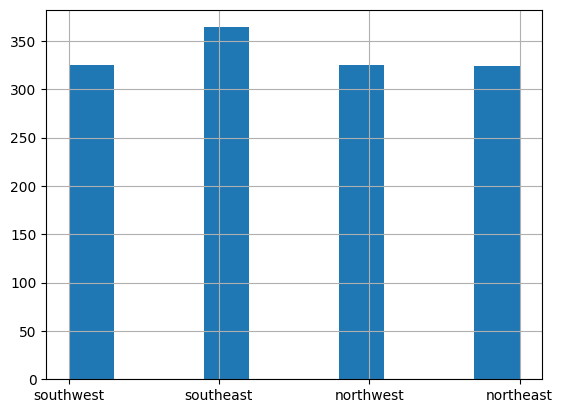

In [266]:
#focus variable region
df['region'].hist()

In [267]:
region_describe = df['region'].describe()
count_region = df['region'].value_counts()

print(region_describe, count_region)



count          1338
unique            4
top       southeast
freq            364
Name: region, dtype: object region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [268]:
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [269]:
#encodage de la colonne sex
df['sex_encoded'] = df['sex'].map({'male': 0, 'female': 1})
df = df.drop('sex', axis = 1)
df.head(10)

,age,bmi,children,smoker,region,charges,sex_encoded
0,19,27.900,0,yes,southwest,16884.92400,1
1,18,33.770,1,no,southeast,1725.55230,0
2,28,33.000,3,no,southeast,4449.46200,0
3,33,22.705,0,no,northwest,21984.47061,0
4,32,28.880,0,no,northwest,3866.85520,0
5,31,25.740,0,no,southeast,3756.62160,1
6,46,33.440,1,no,southeast,8240.58960,1
7,37,27.740,3,no,northwest,7281.50560,1
8,37,29.830,2,no,northeast,6406.41070,0
9,60,25.840,0,no,northwest,28923.13692,1


In [270]:
#encodage de la colonne smoker
df['smoker_encoded'] = df['smoker'].map({'no': 0, 'yes': 1})
df = df.drop('smoker', axis = 1)
df.head(10)

,age,bmi,children,region,charges,sex_encoded,smoker_encoded
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0
5,31,25.740,0,southeast,3756.62160,1,0
6,46,33.440,1,southeast,8240.58960,1,0
7,37,27.740,3,northwest,7281.50560,1,0
8,37,29.830,2,northeast,6406.41070,0,0
9,60,25.840,0,northwest,28923.13692,1,0


stats : 
count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64
age
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64
skew : 0.05567251565299186


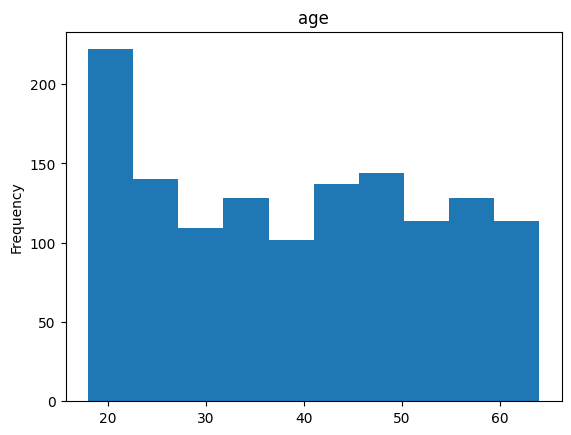

stats : 
count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64
bmi
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: count, Length: 548, dtype: int64
skew : 0.2840471105987448


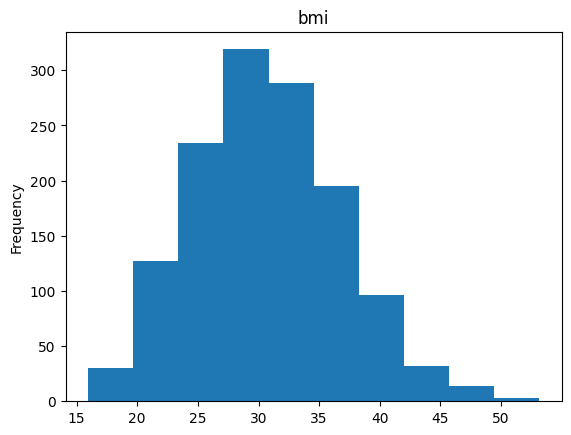

stats : 
count    1338.000000
mean        1.094918
std         1.205493
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         5.000000
Name: children, dtype: float64
children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64
skew : 0.9383804401702414


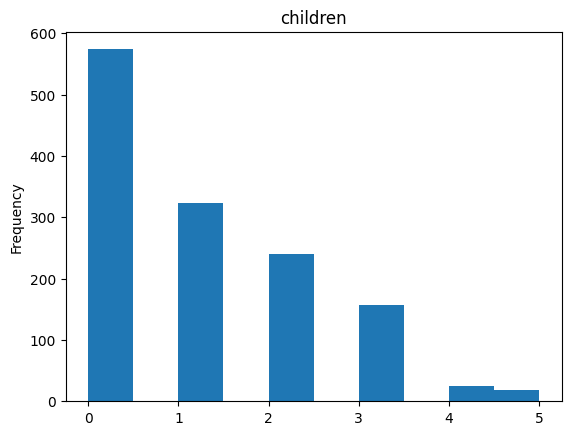

stats : 
count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64
charges
1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455    1
              ..
7345.08400     1
26109.32905    1
28287.89766    1
1149.39590     1
29141.36030    1
Name: count, Length: 1337, dtype: int64
skew : 1.5158796580240388


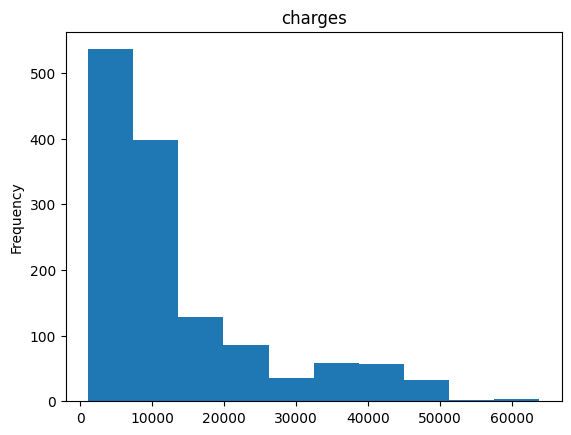

stats : 
count    1338.000000
mean        0.494768
std         0.500160
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: sex_encoded, dtype: float64
sex_encoded
0    676
1    662
Name: count, dtype: int64
skew : 0.02095139743334522


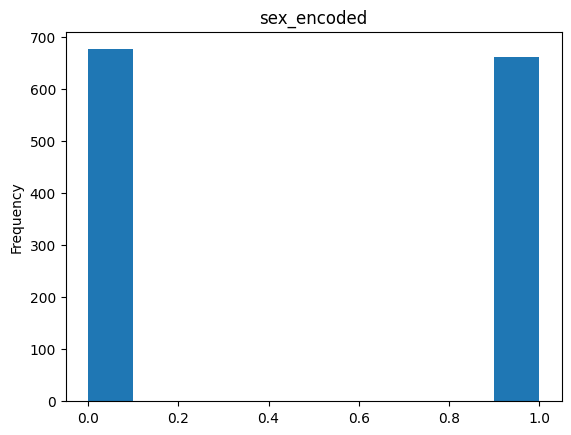

stats : 
count    1338.000000
mean        0.204783
std         0.403694
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: smoker_encoded, dtype: float64
smoker_encoded
0    1064
1     274
Name: count, dtype: int64
skew : 1.4647661601953743


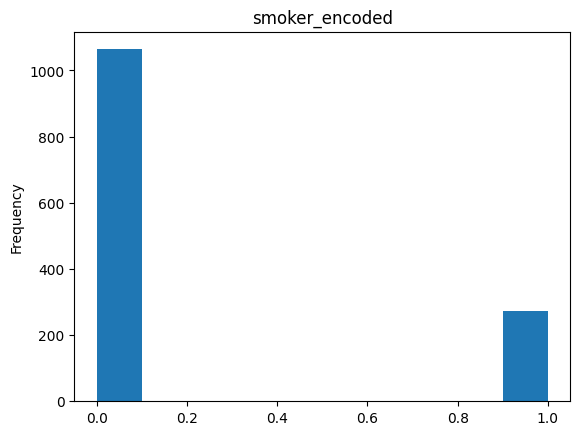

In [278]:
df_sans_region = df.drop('region', axis = 1)

for col in df_sans_region.columns:
  df_sans_region[col].plot(kind='hist')#kind='density' pour afficher une courbe plutot que des barres (on pourra voir les skewed), .plot() -> rien affiche baton par defaut
  plt.title(col)
  #ajouter des stats
  print('stats : ')
  print(df_sans_region[col].describe())
  print(df_sans_region[col].value_counts())
  print('skew :', df_sans_region[col].skew())
  plt.show()#afficher le graphe

age                  Axes(0.125,0.653529;0.227941x0.226471)
bmi               Axes(0.398529,0.653529;0.227941x0.226471)
children          Axes(0.672059,0.653529;0.227941x0.226471)
charges              Axes(0.125,0.381765;0.227941x0.226471)
sex_encoded       Axes(0.398529,0.381765;0.227941x0.226471)
smoker_encoded    Axes(0.672059,0.381765;0.227941x0.226471)
dtype: object

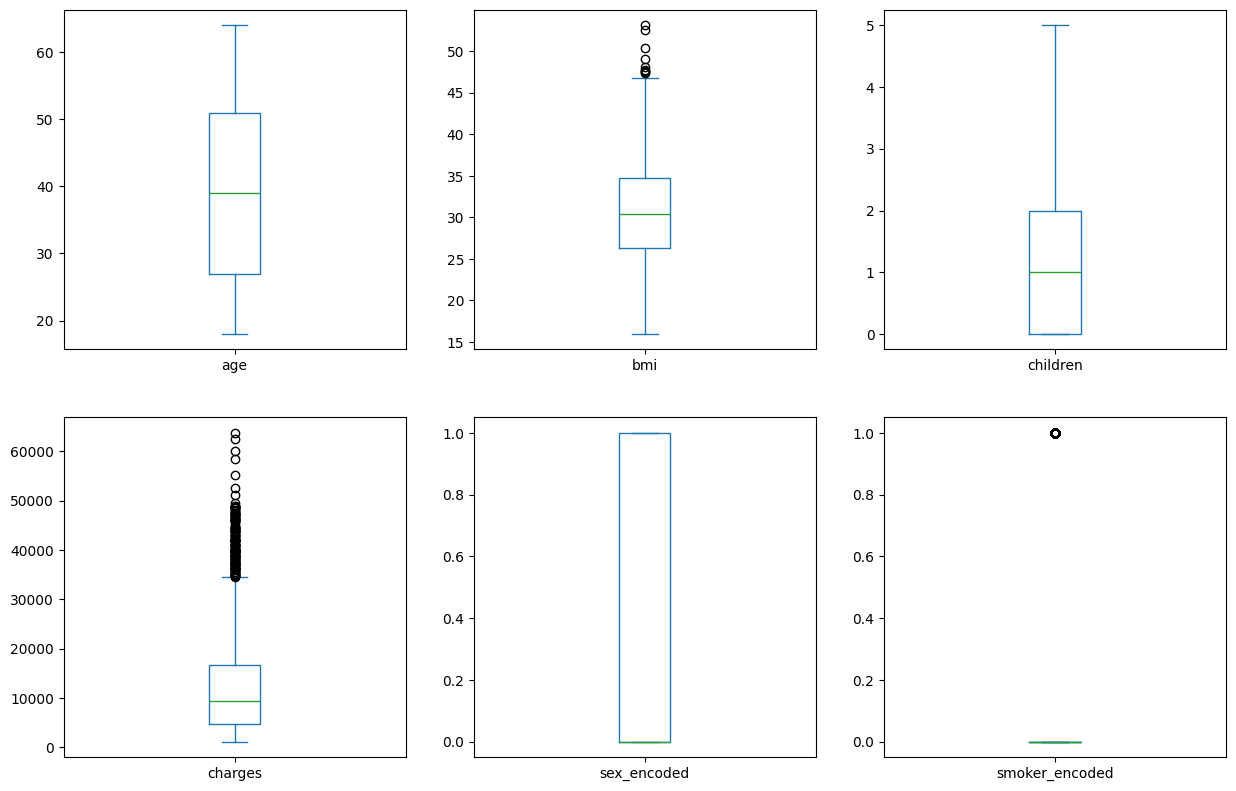

In [272]:
df.plot(kind='box',
          subplots=True,
          layout=(3,3),
          sharex= False, #share x -> le meme x donc le desactiver
          figsize = (15,15) #regler la taille des plots
          )

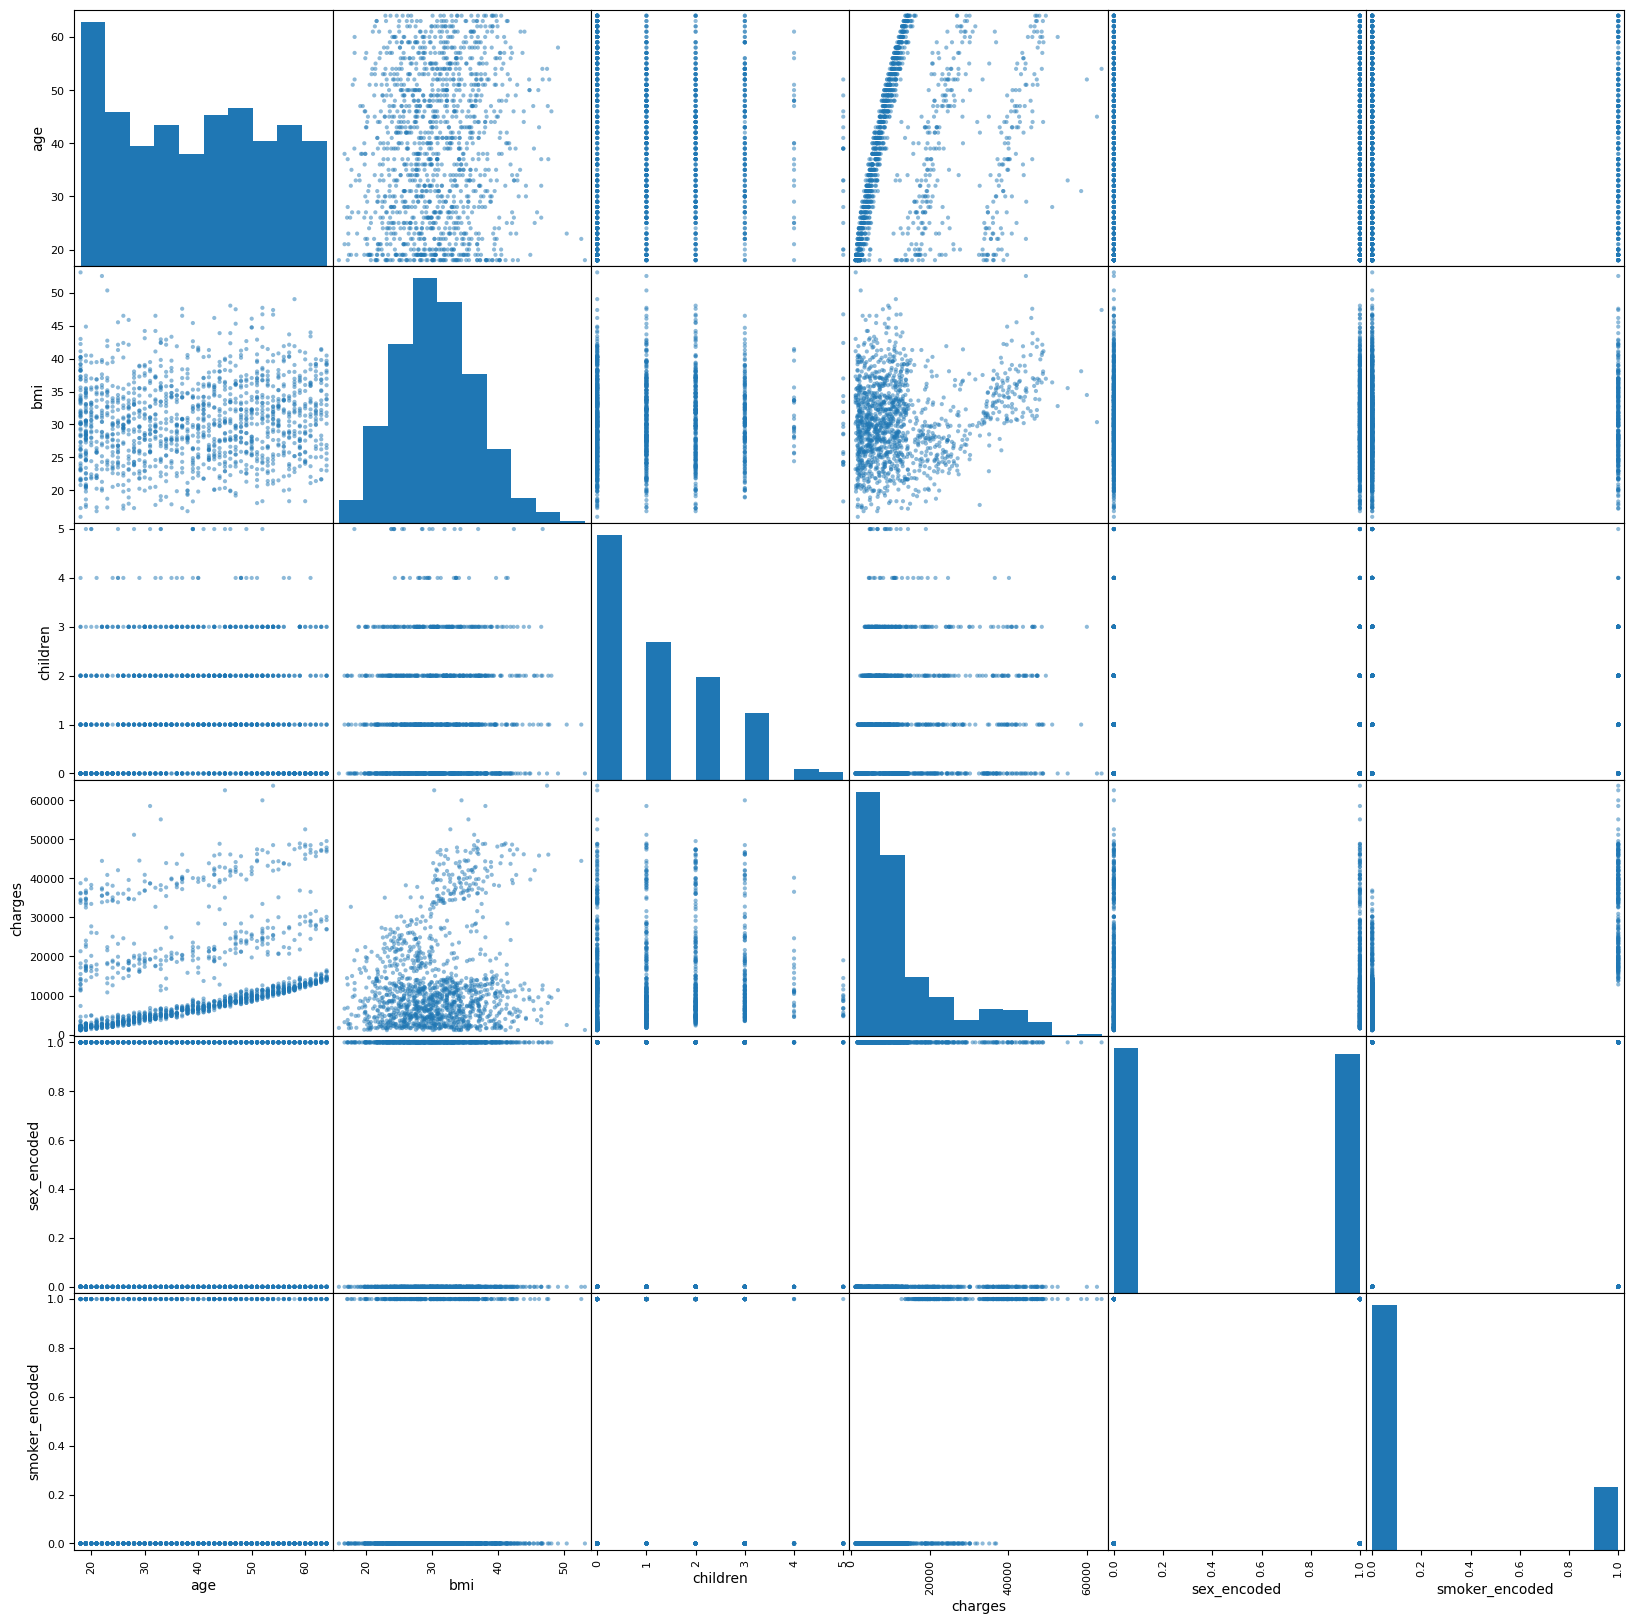

In [273]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(20,20)); #possibilité d'ajouter alpha pour la transparence

Text(0.5, 1.0, 'smoker_encoded vs charges')

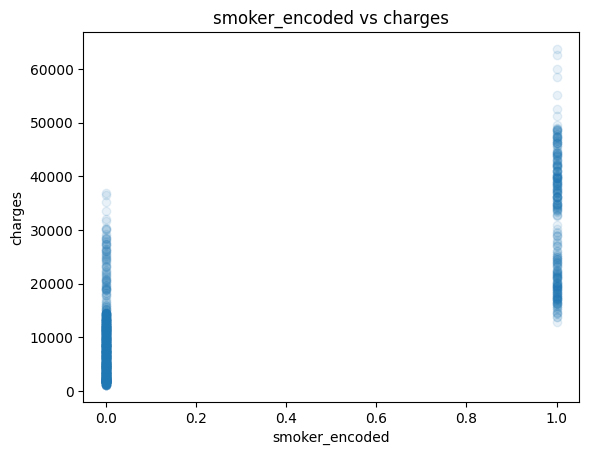

In [274]:
plt.scatter(x=df['smoker_encoded'], y=df['charges'], alpha=0.1)
plt.xlabel('smoker_encoded')
plt.ylabel('charges')
plt.title('smoker_encoded vs charges')

Text(0.5, 1.0, 'charges vs bmi')

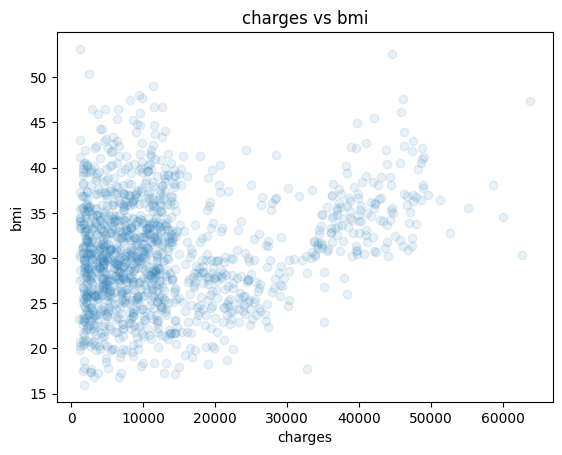

In [275]:
plt.scatter(x=df['charges'], y=df['bmi'], alpha=0.1)
plt.xlabel('charges')
plt.ylabel('bmi')
plt.title('charges vs bmi')

In [276]:
df_sans_region.corr()

,age,bmi,children,charges,sex_encoded,smoker_encoded
age,1.000000,0.109272,0.042469,0.299008,0.020856,-0.025019
bmi,0.109272,1.000000,0.012759,0.198341,-0.046371,0.003750
children,0.042469,0.012759,1.000000,0.067998,-0.017163,0.007673
charges,0.299008,0.198341,0.067998,1.000000,-0.057292,0.787251
sex_encoded,0.020856,-0.046371,-0.017163,-0.057292,1.000000,-0.076185
smoker_encoded,-0.025019,0.003750,0.007673,0.787251,-0.076185,1.000000


In [277]:
#corrélations évidentes :

# on note qu'il y a une corrélation entre la charge et smoker
# entre l'age et les charges

# peu évident
# entre bmi et les charges 
# entre bmi et l'age
print(df)

      age     bmi  children     region      charges  sex_encoded  \
0      19  27.900         0  southwest  16884.92400            1   
1      18  33.770         1  southeast   1725.55230            0   
2      28  33.000         3  southeast   4449.46200            0   
3      33  22.705         0  northwest  21984.47061            0   
4      32  28.880         0  northwest   3866.85520            0   
...   ...     ...       ...        ...          ...          ...   
1333   50  30.970         3  northwest  10600.54830            0   
1334   18  31.920         0  northeast   2205.98080            1   
1335   18  36.850         0  southeast   1629.83350            1   
1336   21  25.800         0  southwest   2007.94500            1   
1337   61  29.070         0  northwest  29141.36030            1   

      smoker_encoded  
0                  1  
1                  0  
2                  0  
3                  0  
4                  0  
...              ...  
1333               0  